In [9]:
import heapq
import sys
from time import time

# Struktura krawędzi używana do priorytetowej kolejki
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

    def __lt__(self, other):
        return self.weight < other.weight

# Algorytm Prima do znajdowania MST
def primMST(graph):
    V = len(graph)
    parent = [-1] * V
    key = [sys.maxsize] * V
    inMST = [False] * V
    pq = []
    totalWeight = 0
    
    # Inicjalizacja z wierzchołkiem 0
    key[0] = 0
    heapq.heappush(pq, Edge(-1, 0, 0))
    
    while pq:
        edge = heapq.heappop(pq)
        u = edge.v
        
        if inMST[u]:
            continue
        inMST[u] = True
        
        if parent[u] != -1:
            totalWeight += graph[u][parent[u]]
        
        for v in range(V):
            if graph[u][v] and not inMST[v] and graph[u][v] < key[v]:
                key[v] = graph[u][v]
                heapq.heappush(pq, Edge(u, v, key[v]))
                parent[v] = u
                
    return parent, totalWeight

# Przechodzenie pre-order po MST
def preorderTraversal(mst, u, visited, path):
    visited[u] = True
    path.append(u)
    for v in mst[u]:
        if not visited[v]:
            preorderTraversal(mst, v, visited, path)

# Generowanie przybliżonego rozwiązania TSP
def approxTSP(graph):
    parent, mstWeight = primMST(graph)
    V = len(graph)
    mst = [[] for _ in range(V)]
    
    for i in range(1, V):
        mst[parent[i]].append(i)
        mst[i].append(parent[i])
        
    visited = [False] * V
    path = []
    preorderTraversal(mst, 0, visited, path)
    path.append(0)  # Zamknięcie cyklu
    
    return path, mstWeight

# Obliczanie całkowitej długości trasy
def calculatePathLength(graph, path):
    totalLength = 0
    edgeLengths = []
    for i in range(len(path) - 1):
        length = graph[path[i]][path[i + 1]]
        totalLength += length
        edgeLengths.append(length)
    return totalLength, edgeLengths

# Weryfikacja poprawności ścieżki
def verifyPath(path, numVertices):
    visitedVertices = [False] * numVertices
    for v in path:
        visitedVertices[v] = True
    return all(visitedVertices)

# Zapis wyników do pliku
def saveResults(path, totalLength, edgeLengths, mstWeight, duration):
    with open("results.txt", "w") as outFile:
        outFile.write("Path: ")
        outFile.write(" ".join(str(v + 1) for v in path))  # adjust back to 1-indexed
        outFile.write("\nEdge lengths: ")
        outFile.write(" ".join(str(length) for length in edgeLengths))
        outFile.write("\n")
        outFile.write(f"Total length of the approximate TSP path: {totalLength}\n")
        outFile.write(f"Total weight of the MST: {mstWeight}\n")
        outFile.write(f"Execution time: {duration} microseconds\n")
        outFile.write(f"Path length (number of edges): {len(path) - 1 - 1}\n")  # Odejmuje dwie krawędzie: jedną dodatkową i jedną początkową

def main():
    with open("C:\\Users\\mcmys\\source\\repos\\ConsoleApplication6\\ConsoleApplication6\\edges1000.txt") as inputFile:
        V, E = map(int, inputFile.readline().split())

        graph = [[0] * V for _ in range(V)]
        totalWeight = 0

        for line in inputFile:
            u, v, w = map(int, line.split())
            graph[u - 1][v - 1] = w
            graph[v - 1][u - 1] = w  # Assuming the graph is undirected
            totalWeight += w

    start = time()

    path, mstWeight = approxTSP(graph)

    stop = time()
    duration = (stop - start) * 1e6  # Convert to microseconds

    totalLength, edgeLengths = calculatePathLength(graph, path)
    isPathValid = verifyPath(path, V)

    print("Approximate TSP path:", " ".join(str(v + 1) for v in path))  # adjust back to 1-indexed
    print(f"Edge lengths: {' '.join(str(length) for length in edgeLengths)}")
    print(f"Total length of the approximate TSP path: {totalLength}")
    print(f"Total weight of the MST: {mstWeight}")
    print(f"Execution time: {duration:.0f} microseconds")
    print(f"Path length (number of edges): {len(path) - 2}")  # Odejmuje dwie krawędzie: jedną dodatkową i jedną początkową
    print(f"Path validity: {'Valid' if isPathValid else 'Invalid'}")

    saveResults(path, totalLength, edgeLengths, mstWeight, duration)

if __name__ == "__main__":
    main()


Approximate TSP path: 1 185 419 851 968 470 67 597 707 112 72 320 511 866 122 56 348 109 191 237 857 773 16 37 913 293 660 100 443 915 31 51 73 167 381 300 932 95 345 962 665 891 106 131 863 526 897 275 281 2 437 55 236 170 473 515 269 299 420 699 288 874 282 612 908 466 646 835 92 642 128 556 682 325 386 927 544 510 548 979 774 740 141 27 408 762 307 483 782 28 84 215 244 813 255 427 540 583 567 590 193 344 337 52 148 497 204 251 634 614 758 999 35 20 336 575 964 796 39 7 276 449 512 105 121 5 294 990 291 150 800 33 499 930 776 732 783 881 182 248 86 378 404 385 53 649 187 621 537 85 568 860 972 853 63 273 97 284 703 407 919 117 456 693 867 918 687 599 591 494 124 432 520 684 492 38 690 372 252 747 151 213 376 716 431 938 375 554 911 6 735 197 945 110 212 955 184 309 316 530 943 455 414 901 398 616 768 145 713 971 156 934 245 475 43 487 327 120 524 364 888 48 527 8 450 738 914 186 389 168 79 572 754 736 430 788 199 965 959 489 277 900 562 3 387 321 88 799 324 741 858 844 200 607 647 2

Total length: 221278
Total weight: 1765
Execution time: 143800.9738922119 microseconds
Path length (number of edges): 999


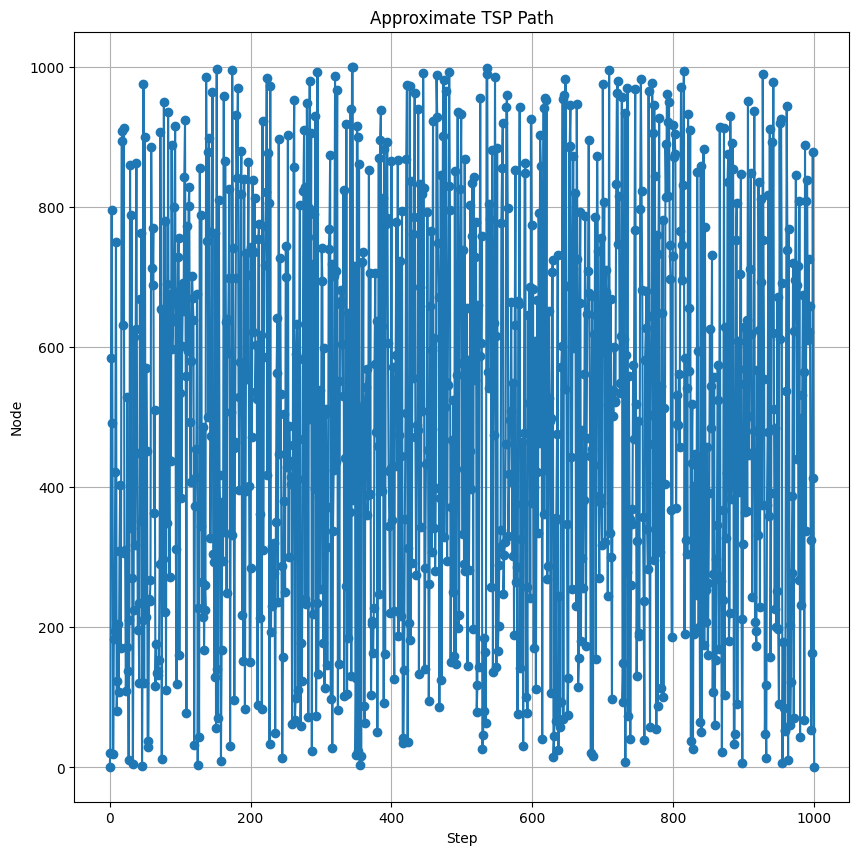

In [8]:
import matplotlib.pyplot as plt

def parse_results(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        path_line = lines[0].strip().split(': ')[1]
        path = list(map(int, path_line.split()))
        edge_lengths_line = lines[1].strip().split(': ')[1]
        edge_lengths = list(map(int, edge_lengths_line.split()))
        total_length = int(lines[2].strip().split(': ')[1])
        total_weight = int(lines[3].strip().split(': ')[1])
        execution_time = float(lines[4].strip().split(': ')[1].split()[0])  # Zmieniamy na float
        path_length = int(lines[5].strip().split(': ')[1])  # Dodajemy wczytywanie liczby krawędzi
    return path, edge_lengths, total_length, total_weight, execution_time, path_length

def plot_path(path):
    plt.figure(figsize=(10, 10))
    x = range(len(path))
    plt.plot(x, path, marker='o')
    plt.title('Approximate TSP Path')
    plt.xlabel('Step')
    plt.ylabel('Node')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    path, edge_lengths, total_length, total_weight, execution_time, path_length = parse_results('results.txt')
    print(f"Total length: {total_length}")
    print(f"Total weight: {total_weight}")
    print(f"Execution time: {execution_time} microseconds")
    print(f"Path length (number of edges): {path_length}")
    plot_path(path)
